In [59]:
import pandas as pd
import torch
import matplotlib.pyplot as plt

import torchvision.io as tio
from torch.utils.data import DataLoader 
from torchvision import datasets, transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [21]:
train_data = pd.read_csv('../../dataset/digit-recog/train.csv')
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
train_data.shape

(42000, 785)

In [23]:
train_data = torch.tensor(train_data.values)


In [24]:
train_data.shape


torch.Size([42000, 785])

In [84]:
target = []
train = []

for row in train_data:
    target.append(row[0])
    train.append(row[1:train_data.shape[1]].view(1, 28, 28))

tensor(5)


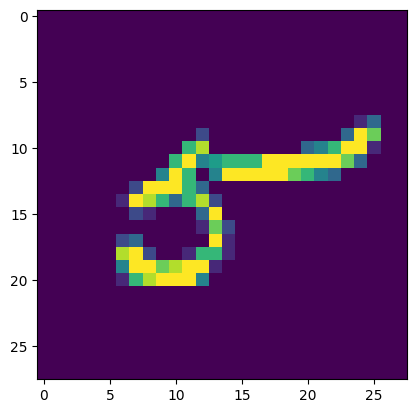

In [85]:
index = 1001
print(target[index])
plt.imshow(train[index].permute(1,2,0))

In [86]:
train = torch.stack(train).float()
target = torch.tensor(target)

print(train.shape, target.shape)

torch.Size([42000, 1, 28, 28]) torch.Size([42000])


In [126]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.dropout1 = nn.Dropout(0.25)
        self.dropout2 = nn.Dropout(0.5)
        self.fc1 = nn.Linear(9216, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)
        return output

model = Net()

In [127]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [129]:
# Create data loaders
batch_size = 512
epochs = 10000
losses = []

for epoch in range(epochs):
    # mini batch
    ix = torch.randint(0, train.shape[0], (batch_size,))
    Xb, Yb = train[ix], target[ix]

    optimizer.zero_grad()
    logits = model(Xb)

    loss = criterion(logits, Yb)
    losses.append(loss)

    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f'Loss for {epoch}: {loss}')


Loss for 0: 15.537229537963867
Loss for 100: 0.3128756582736969
Loss for 200: 0.19580471515655518
Loss for 300: 0.1888752281665802
Loss for 400: 0.15119804441928864
Loss for 500: 0.12430661916732788
Loss for 600: 0.13146914541721344
Loss for 700: 0.10829592496156693
Loss for 800: 0.05838838219642639
Loss for 900: 0.08280292898416519
Loss for 1000: 0.058586157858371735
Loss for 1100: 0.06173386797308922
Loss for 1200: 0.0646209865808487


KeyboardInterrupt: 

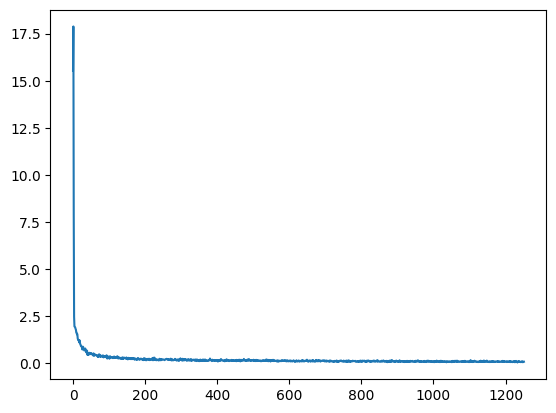

In [134]:
import numpy as np

xpoints = np.array(np.arange(0, len(losses)))
ypoints = np.array([loss.detach() for loss in losses])

plt.plot(xpoints, ypoints)
plt.show()

In [135]:
test_data = pd.read_csv('../../dataset/digit-recog/test.csv')
test_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [136]:
test_data = torch.tensor(test_data.values)

In [137]:
test = []

for row in test_data:
    test.append(row.view(1, 28, 28))

In [138]:
test = torch.stack(test).float()
test.shape

torch.Size([28000, 1, 28, 28])

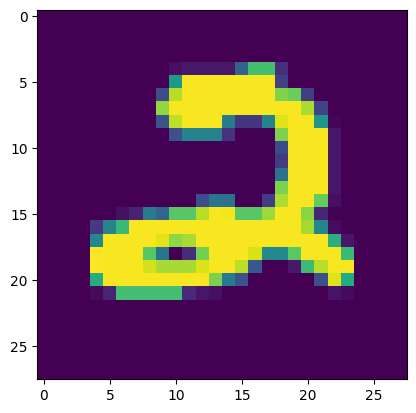

In [139]:
plt.imshow(test[0].permute(1,2,0))

In [140]:
predictions = []

for test_row in test:
    logits = model(torch.stack([test_row]))
    _, predicted = torch.max(logits, 1)
    predictions.append(predicted)

tensor([4])


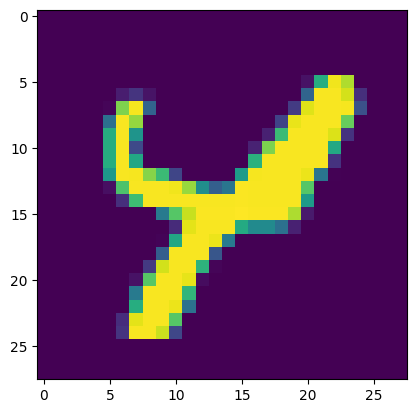

In [142]:
test_ind = 3980
print(predictions[test_ind])
plt.imshow(test[test_ind].permute(1,2,0))

In [143]:
df_predictions = []
for id, pred in enumerate(predictions):
    df_predictions.append([id+1, pred.item()])

In [144]:
final_df = pd.DataFrame(df_predictions)
final_df.to_csv("../../dataset/digit-recog/inference2.csv", header=['ImageId', 'Label'], index=False)